<a href="https://colab.research.google.com/github/juaan-dev/provir-quectel-burr-detection/blob/main/burrDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import csv 
import os
import cv2
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from os import listdir
from os.path import isfile, join

import tensorflow as tf
from sklearn.model_selection import KFold
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from google.colab.patches import cv2_imshow

In [ ]:
def readImages( path, X_train, Y_train  ):
  print("Loading data...")

  files = [ f for f in listdir(path) if isfile(join(path,f)) ]
  files.sort()
  print(files)

  print( len(files), "images..." )

  for i in range( len(files) ):		#  i = identify ----- 0 -  image quantity
    img = cv2.imread( join(path,files[i]), 0 )
#    img = cv2.resize(img, (2160, 150))
#    img = cv2.resize(img, (0,0), fx=0.3, fy=0.3)    # quanto mais proximo de 0, menor a imagem
#   img = cv2.resize(img, (0,0), fx=0.2, fy=0.2)    # quanto mais proximo de 0, menor a imagem
    X_train.append( img )

    name = files[i].split("_")
    name = name[2].split(".")
    if(name[0] == '0'):
      Y_train.append(0)
    elif(name[0] == '1'):
      Y_train.append(1)


  X_train = np.array(X_train)
  Y_train = np.array(Y_train)
  print('X_data shape:', X_train.shape)
  print('Y_data shape:', Y_train.shape)

  #X_train = X_train.reshape((432, 30, 3))
  print(X_train.shape)

  # one hot encode target values
  Y_train = to_categorical(Y_train)
  print(Y_train.shape)
  print(Y_train[12])

  cv2_imshow(img)

  # convert from integers to floats
  X_train = X_train.astype('float32')
  print(X_train.shape)
 
  # normalize to range 0-1
  #X_train= X_train.reshape(32 , 432, 30, 3) 
  print(X_train.shape)
  X_train = X_train / 255.0
  print(X_train.shape)

  del files

  return X_train, Y_train

In [ ]:
def define_model():
	model = Sequential()

#	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(230, 307, 1)))		# 0.3
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(2160,150,1)))		# 0.2
	model.add(MaxPooling2D((2, 2)))

	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))

	model.add(Dense(2, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
 #	opt = Adam(learning_rate=0.01)				
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	print("Evaluating model...")
	scores, histories = list(), list()
	
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	
	c = 1
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		print("fold ", c)
		# define model

		model = define_model()
		# select rows for train and test
		
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=1)
		print('> %.3f' % (acc * 100.0))
		
		# stores scores
		scores.append(acc)
		histories.append(history)
		c += 1
	return scores, histories

In [ ]:
def main():

  from google.colab import drive
  #drive.mount('/content/drive')

  #!unzip /content/drive/MyDrive/DeformedNotes_AME.zip

  path='/content/drive/MyDrive/PROVIR - Grupo 6/Chips_v2/Chip_YUV/V'  #dataset directory from Google Drive, using drive colab function
  

  X_train = []
  Y_train = []

  X_train, Y_train = readImages(path, X_train, Y_train)
  print(X_train.shape)
  print(Y_train.shape)

  return X_train, Y_train
  

Loading data...
['img_100_0.png', 'img_101_0.png', 'img_102_0.png', 'img_103_1.png', 'img_104_0.png', 'img_105_0.png', 'img_106_0.png', 'img_107_0.png', 'img_108_0.png', 'img_109_0.png', 'img_10_0.png', 'img_110_0.png', 'img_111_0.png', 'img_112_0.png', 'img_113_0.png', 'img_114_0.png', 'img_115_0.png', 'img_116_0.png', 'img_117_1.png', 'img_118_1.png', 'img_119_0.png', 'img_11_0.png', 'img_120_1.png', 'img_121_1.png', 'img_122_0.png', 'img_123_0.png', 'img_124_0.png', 'img_125_0.png', 'img_126_1.png', 'img_127_0.png', 'img_128_0.png', 'img_129_0.png', 'img_12_1.png', 'img_130_0.png', 'img_131_0.png', 'img_132_0.png', 'img_133_1.png', 'img_134_0.png', 'img_135_0.png', 'img_136_1.png', 'img_137_0.png', 'img_138_1.png', 'img_139_0.png', 'img_13_0.png', 'img_140_0.png', 'img_141_0.png', 'img_142_0.png', 'img_143_0.png', 'img_144_0.png', 'img_145_0.png', 'img_146_1.png', 'img_147_0.png', 'img_148_0.png', 'img_149_0.png', 'img_14_0.png', 'img_150_0.png', 'img_151_0.png', 'img_152_0.png', 'i

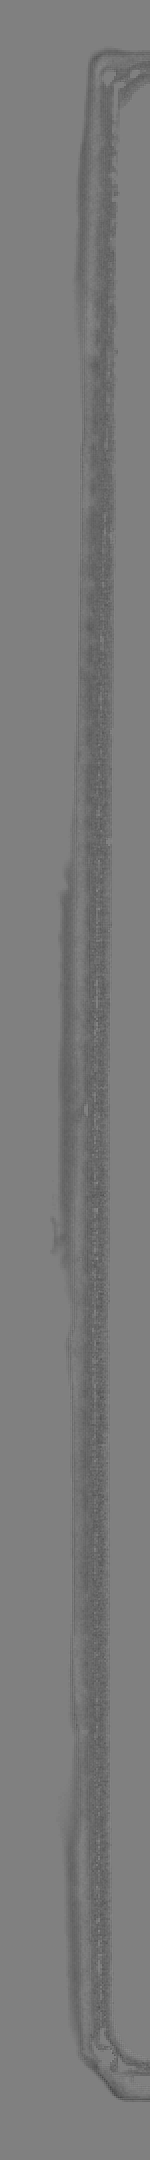

(392, 2160, 150)
(392, 2160, 150)
(392, 2160, 150)
(392, 2160, 150)
(392, 2)
(392, 2160, 150)
(392, 2)
Model setting...
Training and evaluating model...
Evaluating model...
fold  1
Epoch 1/10
10/10 [==============================] - 14s 286ms/step - loss: 12.7604 - accuracy: 0.7348 - val_loss: 0.5864 - val_accuracy: 0.8861
Epoch 2/10
10/10 [==============================] - 2s 211ms/step - loss: 0.5257 - accuracy: 0.8754 - val_loss: 0.4458 - val_accuracy: 0.8861
Epoch 3/10
10/10 [==============================] - 2s 197ms/step - loss: 0.4246 - accuracy: 0.8754 - val_loss: 0.3829 - val_accuracy: 0.8861
Epoch 4/10
10/10 [==============================] - 2s 198ms/step - loss: 0.3875 - accuracy: 0.8754 - val_loss: 0.3617 - val_accuracy: 0.8861
Epoch 5/10
10/10 [==============================] - 2s 198ms/step - loss: 0.3753 - accuracy: 0.8754 - val_loss: 0.3512 - val_accuracy: 0.8861
Epoch 6/10
10/10 [==============================] - 2s 197ms/step - loss: 0.3685 - accuracy: 0.8754 - val_l

ResourceExhaustedError: ignored

In [ ]:
X_train, Y_train = main()

print(X_train.shape)
print(Y_train.shape)

print("Model setting...")
define_model()

print("Training and evaluating model...")
scores, histories = evaluate_model(X_train, Y_train)

print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
